# Hierarchichal clustering of data with mixed variable types using Gower distance

This notebook is based on [this blog](https://www.thinkdatascience.com/post/2019-12-16-introducing-python-package-gower/).

In [18]:
import numpy as np
import pandas as pd

Xd=pd.DataFrame({'age':[21,21,19, 30,21,21,19,30],
'gender':['M','M','M','M',np.nan,'F','F','F'],
'civil_status':['MARRIED','SINGLE','SINGLE','SINGLE','MARRIED','SINGLE','WIDOW','DIVORCED'],
'salary':[3000.0,1200.0 ,32000.0,1800.0 ,2900.0 ,1100.0 ,10000.0,1500.0],
'has_children':[1,0,1,1,1,0,0,1],
'available_credit':[2200,100,22000,1100,2000,100,6000,2200]})
Yd = Xd.iloc[0:1,:]
Xd

,age,gender,civil_status,salary,has_children,available_credit
0,21,M,MARRIED,3000.0,1,2200
1,21,M,SINGLE,1200.0,0,100
2,19,M,SINGLE,32000.0,1,22000
3,30,M,SINGLE,1800.0,1,1100
4,21,NaN,MARRIED,2900.0,1,2000
5,21,F,SINGLE,1100.0,0,100
6,19,F,WIDOW,10000.0,0,6000
7,30,F,DIVORCED,1500.0,1,2200


In [19]:
Yd

,age,gender,civil_status,salary,has_children,available_credit
0,21,M,MARRIED,3000.0,1,2200


In [20]:
import gower
gower.gower_matrix(Xd) # dissimilarity matrix

array([[0.        , 0.3590238 , 0.5040732 , 0.31787416, 0.16872811,
        0.52622986, 0.59697855, 0.47778758],
       [0.3590238 , 0.        , 0.52976364, 0.3138769 , 0.523629  ,
        0.16720603, 0.45600235, 0.6539635 ],
       [0.5040732 , 0.52976364, 0.        , 0.48861402, 0.6728013 ,
        0.6969697 , 0.740428  , 0.8151941 ],
       [0.31787416, 0.3138769 , 0.48861402, 0.        , 0.4824794 ,
        0.48108295, 0.74818605, 0.34332284],
       [0.16872811, 0.523629  , 0.6728013 , 0.4824794 , 0.16666667,
        0.52416843, 0.59904003, 0.4787703 ],
       [0.52622986, 0.16720603, 0.6969697 , 0.48108295, 0.52416843,
        0.        , 0.2898751 , 0.4878362 ],
       [0.59697855, 0.45600235, 0.740428  , 0.74818605, 0.59904003,
        0.2898751 , 0.        , 0.57476616],
       [0.47778758, 0.6539635 , 0.8151941 , 0.34332284, 0.4787703 ,
        0.4878362 , 0.57476616, 0.        ]], dtype=float32)

In [36]:
gower.gower_topn(Xd.iloc[0:1,:], Xd, n = 3) # top n similar items

{'index': array([0, 4, 3], dtype=int64),
 'values': array([0.        , 0.16872811, 0.31787416], dtype=float32)}

In [22]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

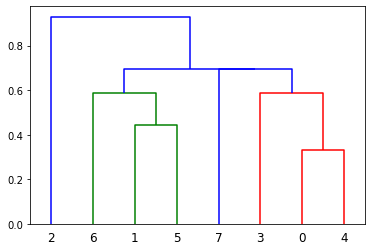

In [24]:
dm = gower.gower_matrix(Xd)
Zd = linkage(dm)
dendrogram(Zd)
plt.show()

Notice that, for example, *0* is more like *4* and less similar to *2*.

In [32]:
Xd.iloc[[0,3,4],:]

,age,gender,civil_status,salary,has_children,available_credit
0,21,M,MARRIED,3000.0,1,2200
3,30,M,SINGLE,1800.0,1,1100
4,21,NaN,MARRIED,2900.0,1,2000


In [34]:
gower.gower_matrix(Xd.iloc[[0,3,4],:])

array([[0.        , 0.6666667 , 0.21085858],
       [0.6666667 , 0.        , 0.7891414 ],
       [0.21085858, 0.7891414 , 0.16666667]], dtype=float32)

In [25]:
cld = fcluster(Zd, 3, criterion='maxclust')
cld

array([2, 1, 3, 2, 2, 1, 1, 2], dtype=int32)